In [1]:
import resources.Get_Data as Get_Data
from resources.single_data.RF_AR import RF_AR
from resources.single_data.CART_AR import CART_AR
from resources.single_data.KNN_AR import KNN_AR
from resources.vectorised_data.MISO.ARX_repr.KNN_ARX import KNN_ARX
from resources.vectorised_data.MISO.ARX_repr.CART_ARX import CART_ARX
from resources.vectorised_data.MISO.ARX_repr.RF_ARX import RF_ARX
import matplotlib.pyplot as plt
import pandas as pd
import julia
from julia import Pkg
from julia import Main
import Get_Vectorised_Data
Pkg.add("DecisionTree")
Main.using("DecisionTree")
import numpy as np
from single_data.rolling_AR import AR_predict
%load_ext julia.magic

[*********************100%***********************]  2 of 2 completed
make_diff()
                 ^GSPC       ^IXIC
Date                              
2021-01-04  -55.420166 -189.830078
2021-01-05   26.210205  120.509766
2021-01-06   21.279785  -78.169922
2021-01-07   55.650146  326.690430
2021-01-08   20.889893  134.500000
...                ...         ...
2022-04-28  103.540039  382.600586
2022-04-29 -155.569824 -536.890625
2022-05-02   23.449707  201.379883
2022-05-03   20.100098   27.740234
2022-05-04  124.689941  401.100586

[337 rows x 2 columns]
Initializing Julia interpreter. This may take some time...


In [2]:
getter = Get_Data.Get_Data("^IXIC", start="2018-08-22", end="2019-10-30", interval="1d")
ixic_vec_norm = getter.make_diff()
ixic_vec_log = getter.make_log_diff()

make_diff()
make_diff()


analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -18.071  |  Wartość krytyczna dla 5%: -2.

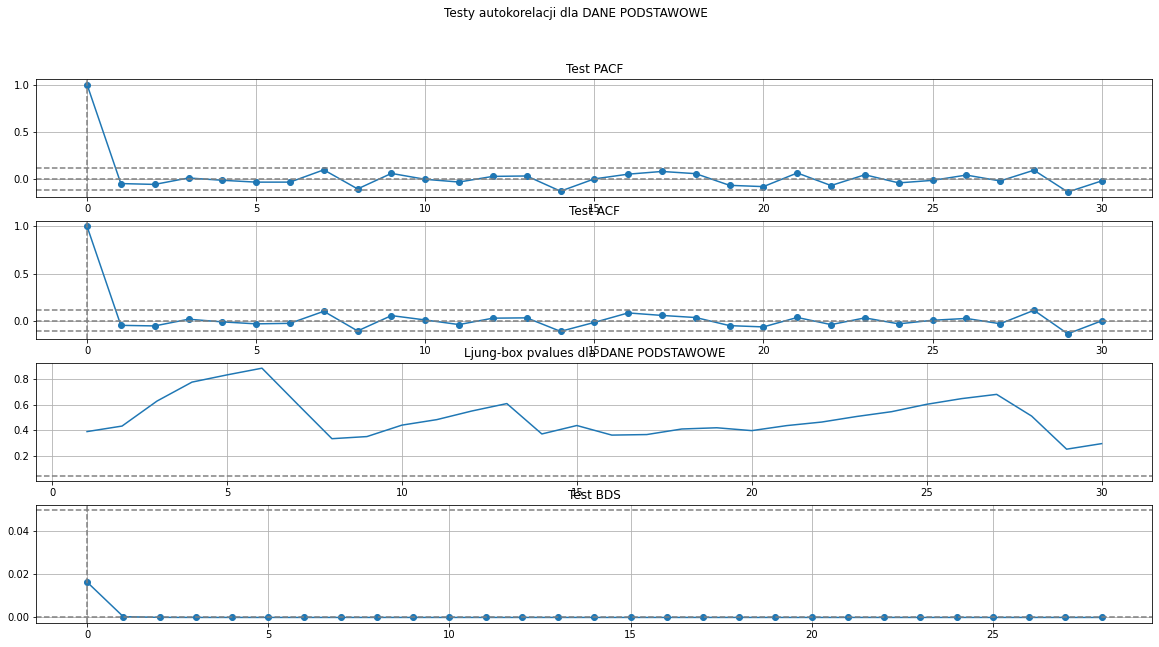

Pvalue testu Jarque-Bera:  2.435845969372963e-10
Statystyka testu Jarque-Bera:  44.27111376015418


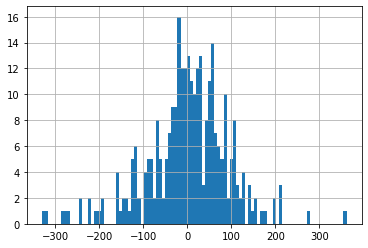

In [3]:
getter.analiza_statystyczna_szeregu(ixic_vec_norm)

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -18.08  |  Wartość krytyczna dla 5%: -2.8

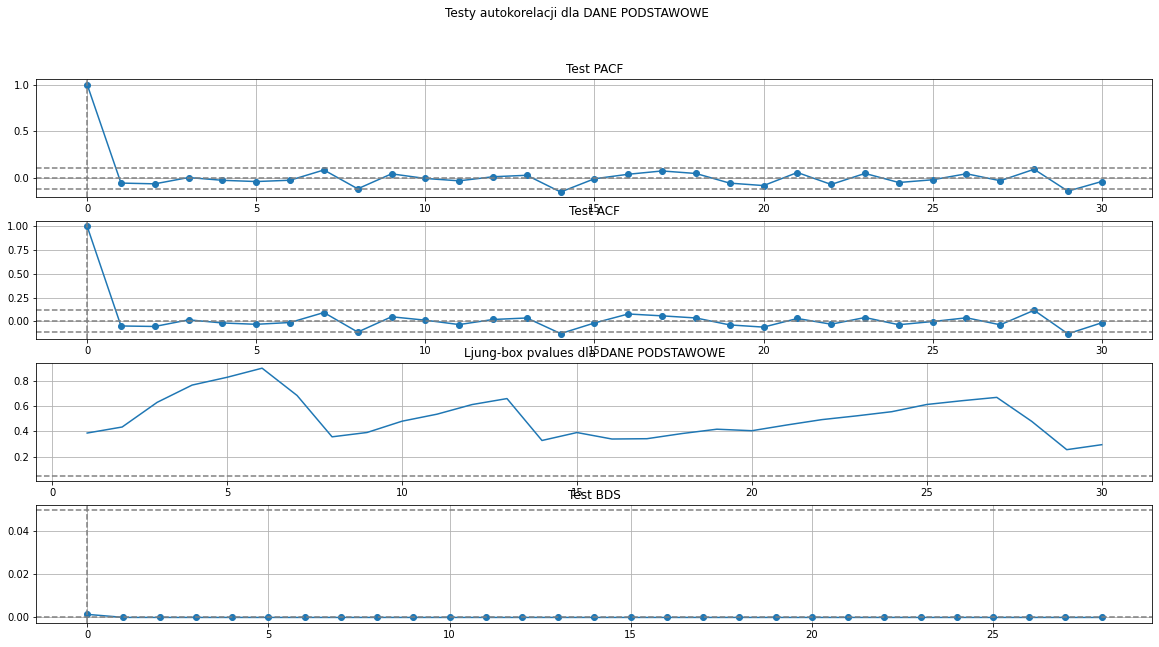

Pvalue testu Jarque-Bera:  1.1102230246251565e-16
Statystyka testu Jarque-Bera:  73.79618291134803


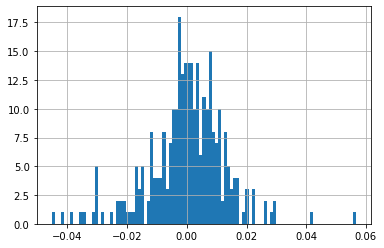

In [4]:
getter.analiza_statystyczna_szeregu(ixic_vec_log)

In [5]:
cart_ar = CART_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = cart_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/3, params = {
    "max_depth": 20,
    "min_samples_split": 3,
    "min_samples_leaf": 3,
})
print(opt)
cart_ar.fit(opt)

Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1645]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   13748500            0     11396234    283719796      2902375  ticks
       #2  4200 MHz   11651828            0      3416640    293796062        64578  ticks
       #3  4200 MHz   19965812            0      6669718    282229000       175093  ticks
       #4  4200 MHz   12422250            0      4093562    292348718        61093  ticks
       #5  4200 MHz   18638359            0      5345718    284880312       110781  ticks
       #6  4200 MHz   10707875            0      3005906    295150609        60937  ticks
       #7  4200 MHz   14561531            0      4676218    289626640        81656  ticks
       #8  4200 MHz   18007203            0      4560968    286296218     

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll



2, 2, 3
2, 3, 2
2, 3, 3
3, 2, 2
3, 2, 3
3, 3, 2
3, 3, 3
4, 2, 2
4, 2, 3
4, 3, 2
4, 3, 3
5, 2, 2
5, 2, 3
5, 3, 2
5, 3, 3
6, 2, 2
6, 2, 3
6, 3, 2
6, 3, 3
7, 2, 2
7, 2, 3
7, 3, 2
7, 3, 3
8, 2, 2
8, 2, 3
8, 3, 2
8, 3, 3
9, 2, 2
9, 2, 3
9, 3, 2
9, 3, 3
10, 2, 2
10, 2, 3
10, 3, 2
10, 3, 3
11, 2, 2
11, 2, 3
11, 3, 2
11, 3, 3
12, 2, 2
12, 2, 3
12, 3, 2
12, 3, 3
13, 2, 2
13, 2, 3
13, 3, 2
13, 3, 3
14, 2, 2
14, 2, 3
14, 3, 2
14, 3, 3
15, 2, 2
15, 2, 3
15, 3, 2
15, 3, 3
16, 2, 2
16, 2, 3
16, 3, 2
16, 3, 3
17, 2, 2
17, 2, 3
17, 3, 2
17, 3, 3
18, 2, 2
18, 2, 3
18, 3, 2
18, 3, 3
19, 2, 2
19, 2, 3
19, 3, 2
19, 3, 3
20, 2, 2
20, 2, 3
20, 3, 2
20, 3, 3{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,

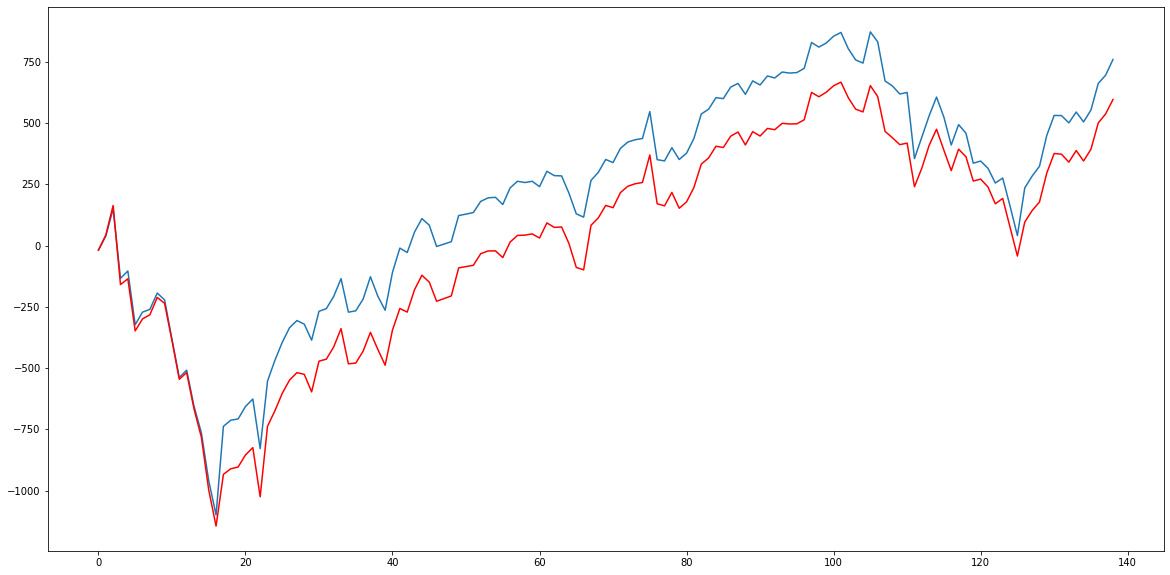

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(cart_ar.data[cart_ar.prog:].values))
plt.plot(np.cumsum(cart_ar.predictions), c='r')

forecast_raw


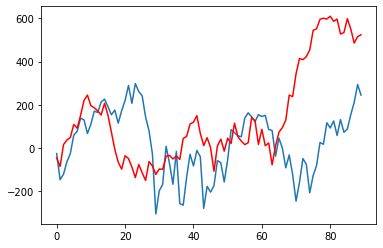

In [7]:
plt.plot(np.cumsum(cart_ar.data_test.values))
plt.plot(np.cumsum(cart_ar.forecast_raw()), c='r')

In [8]:
rf_ar = RF_AR(data=ixic_vec_norm, params={"lags": 2}, test_ratio=0.7)

opt_rf = rf_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/3, params = {
    "max_depth": 10,
    "n_estimators": 10,
    "min_samples_split": 3,
    "min_samples_leaf": 3
})


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1645]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   13750062            0     11396750    283723937      2902453  ticks
       #2  4200 MHz   11653281            0      3417031    293800437        64578  ticks
       #3  4200 MHz   19967734            0      6670078    282232937       175093  ticks
       #4  4200 MHz   12424125            0      4093859    292352765        61093  ticks
       #5  4200 MHz   18640359            0      5345921    284884328       110781  ticks
       #6  4200 MHz   10709546            0      3006156    295154906        60937  ticks
       #7  4200 MHz   14563515            0      4676500    289630593        81671  ticks
       #8  4200 MHz   18009453            0      4561140    286300015    

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll



2, 1, 2, 3
2, 1, 3, 2
2, 1, 3, 3
2, 2, 2, 2
2, 2, 2, 3
2, 2, 3, 2
2, 2, 3, 3
2, 3, 2, 2
2, 3, 2, 3
2, 3, 3, 2
2, 3, 3, 3
2, 4, 2, 2
2, 4, 2, 3
2, 4, 3, 2
2, 4, 3, 3
2, 5, 2, 2
2, 5, 2, 3
2, 5, 3, 2
2, 5, 3, 3
2, 6, 2, 2
2, 6, 2, 3
2, 6, 3, 2
2, 6, 3, 3
2, 7, 2, 2
2, 7, 2, 3
2, 7, 3, 2
2, 7, 3, 3
2, 8, 2, 2
2, 8, 2, 3
2, 8, 3, 2
2, 8, 3, 3
2, 9, 2, 2
2, 9, 2, 3
2, 9, 3, 2
2, 9, 3, 3
2, 10, 2, 2
2, 10, 2, 3
2, 10, 3, 2
2, 10, 3, 3
3, 1, 2, 2
3, 1, 2, 3
3, 1, 3, 2
3, 1, 3, 3
3, 2, 2, 2
3, 2, 2, 3
3, 2, 3, 2
3, 2, 3, 3
3, 3, 2, 2
3, 3, 2, 3
3, 3, 3, 2
3, 3, 3, 3
3, 4, 2, 2
3, 4, 2, 3
3, 4, 3, 2
3, 4, 3, 3
3, 5, 2, 2
3, 5, 2, 3
3, 5, 3, 2
3, 5, 3, 3
3, 6, 2, 2
3, 6, 2, 3
3, 6, 3, 2
3, 6, 3, 3
3, 7, 2, 2
3, 7, 2, 3
3, 7, 3, 2
3, 7, 3, 3
3, 8, 2, 2
3, 8, 2, 3
3, 8, 3, 2
3, 8, 3, 3
3, 9, 2, 2
3, 9, 2, 3
3, 9, 3, 2
3, 9, 3, 3
3, 10, 2, 2
3, 10, 2, 3
3, 10, 3, 2
3, 10, 3, 3
4, 1, 2, 2
4, 1, 2, 3
4, 1, 3, 2
4, 1, 3, 3
4, 2, 2, 2
4, 2, 2, 3
4, 2, 3, 2
4, 2, 3, 3
4, 3, 2, 2
4, 3, 2, 3
4, 3, 3, 2
4

{'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 9, 'min_samples_split': 2}
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (69, 2)
(69,) (

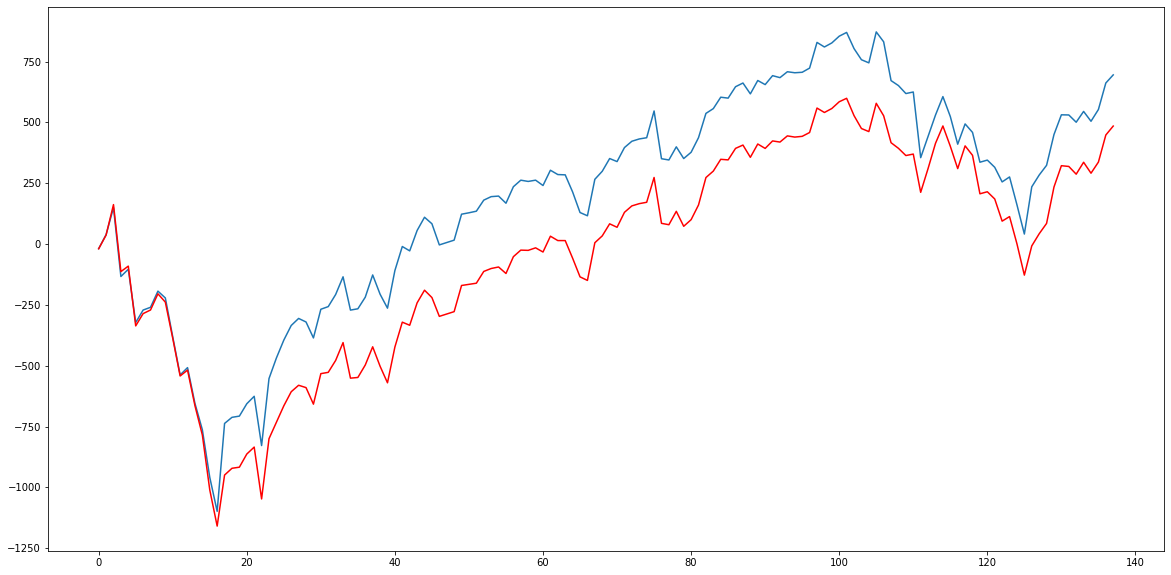

In [9]:
rf_ar.fit(opt_rf)

plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(rf_ar.data[rf_ar.prog:].values))
plt.plot(np.cumsum(rf_ar.predictions), c='r')

forecast_raw
90 90
forecast_raw


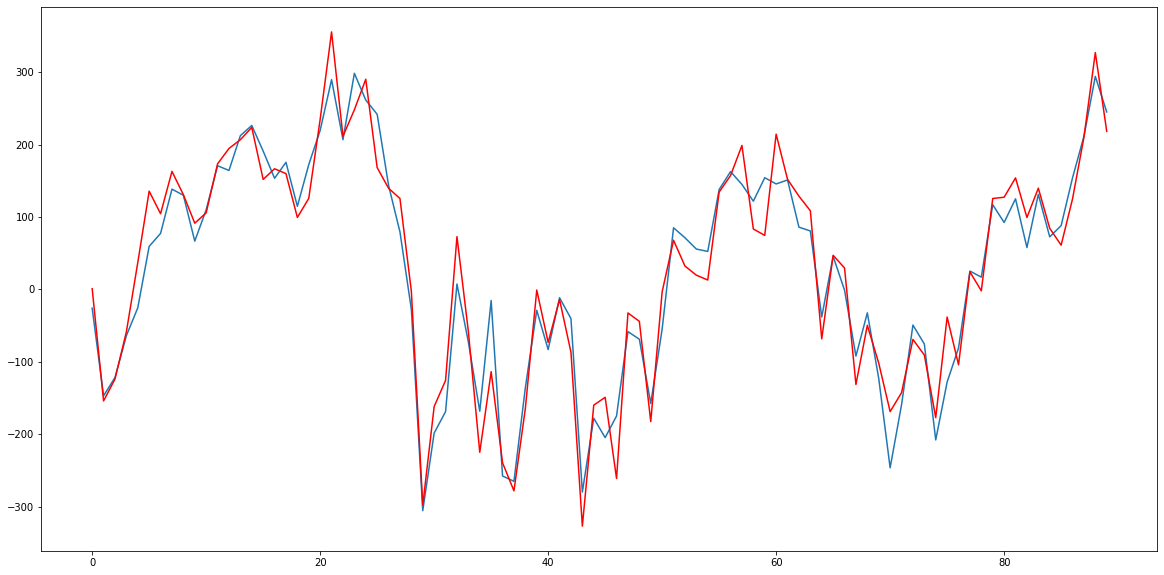

In [10]:
print(len(np.cumsum(rf_ar.data_test.values)), len(rf_ar.forecast_raw()))
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(rf_ar.data_test.values))
plt.plot(np.cumsum(rf_ar.data_test.values) + rf_ar.forecast_raw(), c='r')

In [11]:
knn_ar = KNN_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt_knn = knn_ar.cross_validation_rolling_window(dlugosc_okna=1/3, params={"k_neighbors":20,"weights":['uniform', 'distance'],"p":[1, 2]})

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
cross_validation_rolling_window


{'k_neighbors': 19, 'weights': 'distance', 'p': 1}
fit


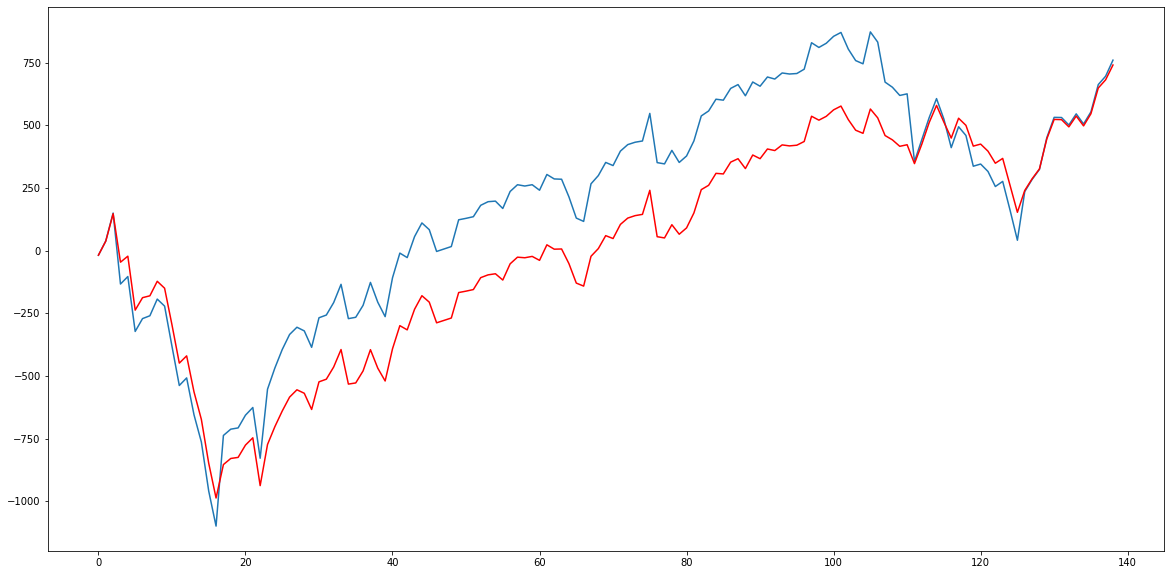

In [12]:

knn_ar.fit(opt_knn)

plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(knn_ar.data[knn_ar.prog:].values))
plt.plot(np.cumsum(knn_ar.predictions), c='r')

forecast_raw


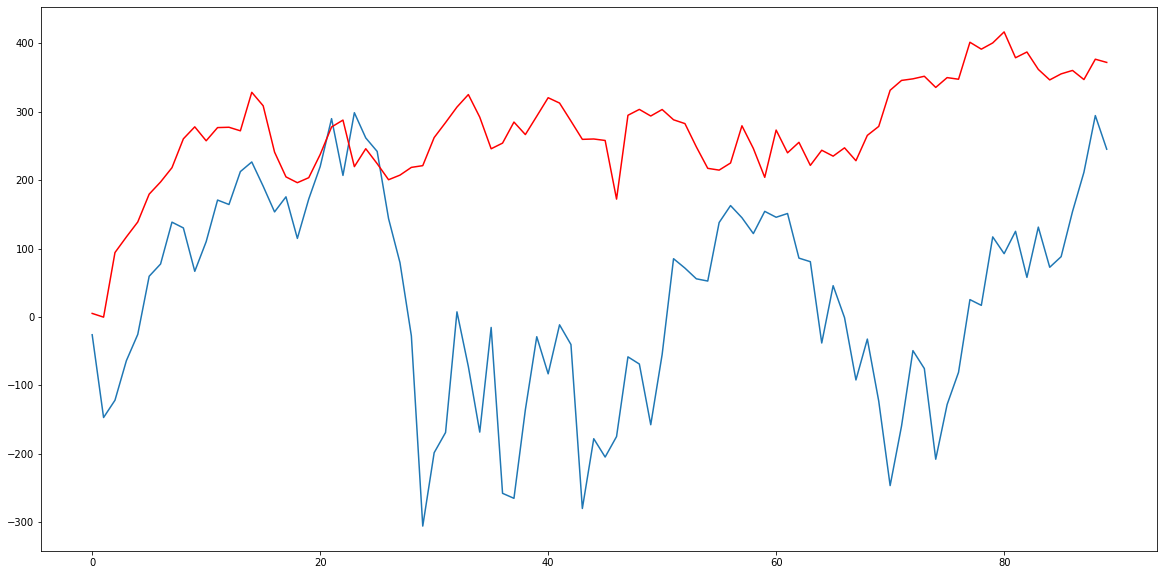

In [13]:
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(knn_ar.data_test.values))
plt.plot(np.cumsum(knn_ar.forecast_raw()), c='r')

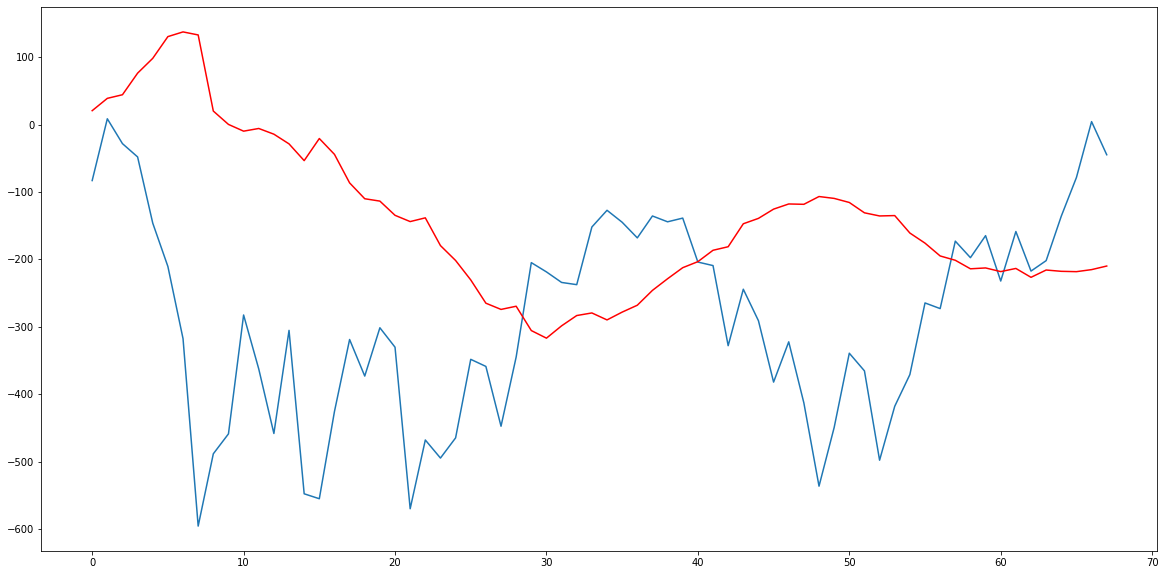

In [23]:
ar = AR_predict(data=ixic_vec_norm, p=1, test_ratio=.7, okno=1/4)
plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(ar.test.values[int(len(ar.test) * 1/4):]))
plt.plot(np.cumsum(ar.predict()), c='r')